In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
CH4JE = pd.read_csv('./magazine/final/CH4JE_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
CH4JE['ADFN_2'] = CH4JE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
CH4JE['ADFN_2']

0                          [메탈, 레진, 귀고리, CHANEL, CHANEL]
1      [컬러, 블록, 조화로운, 부츠, CHANEL, CHANEL, 와인, 색, 하이, ...
2      [빈티지, 한, 체크, 무늬, 재킷, CELINE, CELINE, 비비드, 핑크, ...
3      [울, 톱, 타이, 울, 트위드, 스커트, 보랏빛, 그러데이션, 쇼퍼, 리본, 장식...
4                    [브랜드, 로고, 장식, 서프보드, CHANEL, CHANEL]
                             ...                        
709    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
710    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
711    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
712    [BLACKPINK, 로제, 리사, 지수, 솔로, 곡, 발매, 된다, 오는, 첫, ...
713    [K, 팝, 그룹, 최초, BLACKPINK, 뚜두뚜두, DDU, DU, DDU, ...
Name: ADFN_2, Length: 714, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./CH4JE_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,제니,9314
1,귀엽다,2144
2,예쁘다,1818
3,CHANEL,1663
4,사랑,857
...,...,...
495,사이,46
496,있게,46
497,상품,46
498,갑자기,46


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['제니', '귀엽다', '예쁘다', 'CHANEL', '사랑', '얼굴', '무대', '노래', '매력', '옷', '스타일', '잘', '브랜드', '아이돌', '젠득', '여자', '컬러', '팬', '느낌', '룩', '실력', '영어', '걸', '모델', '눈', '패션', '처음', '블랙', '앞머리', '머리']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['제니', '귀엽다', '예쁘다', 'CHANEL', '사랑', '얼굴', '무대', '노래', '매력', '옷', '스타일', '잘', '브랜드', '아이돌', '젠득', '여자', '컬러', '팬', '느낌', '룩', '실력', '영어', '걸', '모델', '눈', '패션', '처음', '블랙', '앞머리', '머리', 'KARL', '장식', '드레스', '쇼', '백', '최고', '예능', '랩', '좋은', '헤어', '모습', '춤', '분위기', '목소리', '한국', '표정', '멤버', '의상', '세상', '재킷']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['제니', '귀엽다', '예쁘다', 'CHANEL', '사랑', '얼굴', '무대', '노래', '매력', '옷', '스타일', '잘', '브랜드', '아이돌', '젠득', '여자', '컬러', '팬', '느낌', '룩', '실력', '영어', '걸', '모델', '눈', '패션', '처음', '블랙', '앞머리', '머리', 'KARL', '장식', '드레스', '쇼', '백', '최고', '예능', '랩', '좋은', '헤어', '모습', '춤', '분위기', '목소리', '한국', '표정', '멤버', '의상', '세상', '재킷', '공주', '발음', '자체', '연예인', '고급', '세계', '라이브', '파리', '치마', '디자인', '포인트', '화이트', '완성', '스타일링', '많은', '시작', '인간', '아이템', '입덕', '여성', '디자이너', '제일', '좋다', '팬츠', '레드', '새로운', '썸네일', '봄', '스타', '그룹', '애기', '연출', '레전드', '외모', '영화', '라인', '마음', '이미지', '주얼리', '쿠마', '솔로', '메이크업', '매치', '다양한', '첫', '가방', '공개', '소화', '가수', '핑크']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['제니', '귀엽다', '예쁘다', 'CHANEL', '사랑', '얼굴', '무대', '노래', '매력', '옷', '스타일', '잘', '브랜드', '아이돌', '젠득', '여자', '컬러', '팬', '느낌', '룩', '실력', '영어', '걸', '모델', '눈', '패션', '처음', '블랙', '앞머리', '머리', 'KARL', '장식', '드레스', '쇼', '백', '최고', '예능', '랩', '좋은', '헤어', '모습', '춤', '분위기', '목소리', '한국', '표정', '멤버', '의상', '세상', '재킷', '공주', '발음', '자체', '연예인', '고급', '세계', '라이브', '파리', '치마', '디자인', '포인트', '화이트', '완성', '스타일링', '많은', '시작', '인간', '아이템', '입덕', '여성', '디자이너', '제일', '좋다', '팬츠', '레드', '새로운', '썸네일', '봄', '스타', '그룹', '애기', '연출', '레전드', '외모', '영화', '라인', '마음', '이미지', '주얼리', '쿠마', '솔로', '메이크업', '매치', '다양한', '첫', '가방', '공개', '소화', '가수', '핑크', '남자', '멋있다', '나도', '명품', '영감', '선택', 'COUTURE', '티', '코코', '고양이', '패턴', '인기', '볼', '활동', '순간', '웃기', '럭셔리', '대', '착용', '마지막', 'YG', '키', '관심', '코디', '좋겠다', '한번', '탑', '누가', '살', '제발', '톱', '트위드', '슈트', '시크', '미국', '대박', '스커트', '소리', '여름', '미쳤다', '가장', '사용', '블링크', '하우스', '손', '명', '곱창', '몸매', '밴드', '음악', '울', '심장', '무드', '촬영', '데뷔', '타팬', '성격', '집', '컴백', '어깨', '미니', '젠',

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['제니', '귀엽다', '예쁘다', 'CHANEL', '사랑', '얼굴', '무대', '노래', '매력', '옷', '스타일', '잘', '브랜드', '아이돌', '젠득', '여자', '컬러', '팬', '느낌', '룩', '실력', '영어', '걸', '모델', '눈', '패션', '처음', '블랙', '앞머리', '머리', 'KARL', '장식', '드레스', '쇼', '백', '최고', '예능', '랩', '좋은', '헤어', '모습', '춤', '분위기', '목소리', '한국', '표정', '멤버', '의상', '세상', '재킷', '공주', '발음', '자체', '연예인', '고급', '세계', '라이브', '파리', '치마', '디자인', '포인트', '화이트', '완성', '스타일링', '많은', '시작', '인간', '아이템', '입덕', '여성', '디자이너', '제일', '좋다', '팬츠', '레드', '새로운', '썸네일', '봄', '스타', '그룹', '애기', '연출', '레전드', '외모', '영화', '라인', '마음', '이미지', '주얼리', '쿠마', '솔로', '메이크업', '매치', '다양한', '첫', '가방', '공개', '소화', '가수', '핑크', '남자', '멋있다', '나도', '명품', '영감', '선택', 'COUTURE', '티', '코코', '고양이', '패턴', '인기', '볼', '활동', '순간', '웃기', '럭셔리', '대', '착용', '마지막', 'YG', '키', '관심', '코디', '좋겠다', '한번', '탑', '누가', '살', '제발', '톱', '트위드', '슈트', '시크', '미국', '대박', '스커트', '소리', '여름', '미쳤다', '가장', '사용', '블링크', '하우스', '손', '명', '곱창', '몸매', '밴드', '음악', '울', '심장', '무드', '촬영', '데뷔', '타팬', '성격', '집', '컴백', '어깨', '미니', '젠',

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['제니', '귀엽다', '예쁘다', 'CHANEL', '사랑', '얼굴', '무대', '노래', '매력', '옷', '스타일', '잘', '브랜드', '아이돌', '젠득', '여자', '컬러', '팬', '느낌', '룩', '실력', '영어', '걸', '모델', '눈', '패션', '처음', '블랙', '앞머리', '머리', 'KARL', '장식', '드레스', '쇼', '백', '최고', '예능', '랩', '좋은', '헤어', '모습', '춤', '분위기', '목소리', '한국', '표정', '멤버', '의상', '세상', '재킷', '공주', '발음', '자체', '연예인', '고급', '세계', '라이브', '파리', '치마', '디자인', '포인트', '화이트', '완성', '스타일링', '많은', '시작', '인간', '아이템', '입덕', '여성', '디자이너', '제일', '좋다', '팬츠', '레드', '새로운', '썸네일', '봄', '스타', '그룹', '애기', '연출', '레전드', '외모', '영화', '라인', '마음', '이미지', '주얼리', '쿠마', '솔로']


### top50만 남기기

In [14]:
len(CH4JE)

714

In [15]:
top30_word = []
for i in range(len(CH4JE)):
    w=[]
    for word in CH4JE.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [16]:
top50_word = []
for i in range(len(CH4JE)):
    w=[]
    for word in CH4JE.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(CH4JE)):
    w=[]
    for word in CH4JE.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top200_word = []
for i in range(len(CH4JE)):
    w=[]
    for word in CH4JE.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [19]:
top300_word = []
for i in range(len(CH4JE)):
    w=[]
    for word in CH4JE.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [20]:
top500_word = []
for i in range(len(CH4JE)):
    w=[]
    for word in CH4JE.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [21]:
CH4JE

,magazine,brand,title,word,ADFN,ADFN_2
0,A,Ch,"가을 트렌드 컬러, 위대한 블랙의 위로","메탈과 레진으로 만든 귀고리는 가격미정, CHANEL(CHANEL).","['메탈', '레진', '귀고리', 'CHANEL', 'CHANEL']","[메탈, 레진, 귀고리, CHANEL, CHANEL]"
1,A,Ch,가을의 그림자만큼 길어진 롱부츠 12가지,"컬러블록이 조화로운 부츠는 가격미정, CHANEL(CHANEL). 와인색 니하이...","['컬러', '블록', '조화로운', '부츠', 'CHANEL', 'CHANEL',...","[컬러, 블록, 조화로운, 부츠, CHANEL, CHANEL, 와인, 색, 하이, ..."
2,A,Ch,가을에 어울리는 색을 딱 하나 고르면? 카멜색!,"빈티지한 체크무늬 재킷은 가격미정, CELINE(CELINE). 비비드한 핑크 컬러...","['빈티', '한', '체크', '무늬', '재킷', 'CELINE', 'CELIN...","[빈티지, 한, 체크, 무늬, 재킷, CELINE, CELINE, 비비드, 핑크, ..."
3,A,Ch,가을 신상과 함께하는 한여름밤의 외출! [1],"울 소재 톱과 타이다이 울 트위드 소재 스커트, 보랏빛 그러데이션 쇼퍼백, 앵클...","['울', '톱', '타이', '울', '트', '위드', '스커트', '보랏빛',...","[울, 톱, 타이, 울, 트위드, 스커트, 보랏빛, 그러데이션, 쇼퍼, 리본, 장식..."
4,A,Ch,급하고 빠르게 배워보는 서핑 아이템,"브랜드 로고를 장식한 서프보드는 가격미정, CHANEL(CHANEL).","['브랜드', '로고', '장식', '서프보드', 'CHANEL', 'CHANEL']","[브랜드, 로고, 장식, 서프보드, CHANEL, CHANEL]"
...,...,...,...,...,...,...
709,W,Je,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ..."
710,W,Je,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ..."
711,W,Je,블랙핑크 컴백! 남다른 패션 스타일링,"한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...","['한국', '신진', '디자이너', '하이', '패션', '브랜드', '섭렵', ...","[한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,..."
712,W,Je,"블랙핑크 로제, 리사, 지수 솔로곡 공개한다","BLACKPINK 로제, 리사, 지수의 솔로곡이 발매된다., , 오는 9월 첫 정규...","['BLACKPINK', '로제', '리사', '지수', '솔로', '곡', '발매...","[BLACKPINK, 로제, 리사, 지수, 솔로, 곡, 발매, 된다, 오는, 첫, ..."


### item 남기기

In [129]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [130]:
item_word = []
for i in range(len(mag_je)):
    w=[]
    for word in mag_je.loc[i, 'ADFN']:
        if word in item:
            w.append(word)
    item_word.append(w)

NameError: name 'mag_je' is not defined

### top100이면서 item이 아닌 것

In [15]:
top100_not_item_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN']:
        if word in top100:
            if word not in item:
                w.append(word)
    top100_not_item_word.append(w)

In [16]:
len(top100_not_item_word)

297

In [172]:
top100_not_item_word[1]

['디자이너',
 '가을',
 '겨울',
 '스타일링',
 '모델',
 'CHANEL',
 '클래식',
 '룩',
 'CHANEL',
 '여성',
 'CHANEL',
 '가브리엘',
 '디자인',
 '디자인',
 '사랑',
 '사랑',
 '사랑',
 '라인',
 '라인',
 '클래식',
 '라인',
 'CHANEL']

In [47]:
top50_word

[['CHANEL', 'CHANEL'],
 ['디자이너',
  '시작',
  '모델',
  '옷',
  '처음',
  'CHANEL',
  '백',
  '룩',
  '처음',
  'CHANEL',
  '여성',
  'CHANEL',
  '디자인',
  '디자인',
  '사랑',
  '사랑',
  '새로운',
  '사랑',
  '옷',
  '걸',
  '걸',
  '재킷',
  '재킷',
  '재킷',
  '백',
  '백',
  'CHANEL',
  '백'],
 ['CHANEL'],
 ['브랜드',
  'CHANEL',
  '브랜드',
  '새로운',
  '느낌',
  '브랜드',
  '럭셔리',
  '브랜드',
  '럭셔리',
  '브랜드',
  '브랜드',
  'CHANEL'],
 ['컬러', 'CHANEL', 'CHANEL'],
 ['디자인', '컬러', '백', '컬러', 'CHANEL', 'CHANEL'],
 ['스타일', '컬러', 'CHANEL'],
 ['백', 'CHANEL', 'CHANEL'],
 ['재킷', '컬러', 'CHANEL', 'CHANEL'],
 ['코코', 'CHANEL', '주얼리', 'CHANEL'],
 ['재킷', '블랙', 'CHANEL', '주얼리', '장식', 'CHANEL', 'CHANEL', '장식'],
 ['CHANEL', 'CHANEL', 'KARL', 'CHANEL', 'CHANEL', '눈', 'CHANEL', '쇼'],
 ['트위드', '장식', 'CHANEL', 'CHANEL'],
 ['장식', '백', 'CHANEL', 'CHANEL'],
 ['CHANEL', 'CHANEL'],
 ['장식', 'CHANEL', 'CHANEL'],
 ['브랜드', '장식', 'CHANEL', 'CHANEL'],
 ['백', 'CHANEL', 'CHANEL'],
 ['CHANEL', '백', '화이트', 'CHANEL', '백', '블랙', '아이템', '매력'],
 ['장식', '재킷', 'CHANEL', 'CHANEL'

In [49]:
len(top50_word)

351

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [22]:
# 어프라이어리(Apriori)
from apyori import apriori

In [23]:
top30_word[0]

['CHANEL', 'CHANEL']

In [57]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.07))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
138,"(CHANEL, 브랜드)",0.196078,"[((), (CHANEL, 브랜드), 0.19607843137254902, 1.0)...",2
146,"(CHANEL, 스타일)",0.162465,"[((), (CHANEL, 스타일), 0.16246498599439776, 1.0)...",2
227,"(스타일, 제니)",0.158263,"[((), (스타일, 제니), 0.15826330532212884, 1.0), ((...",2
159,"(CHANEL, 장식)",0.151261,"[((), (CHANEL, 장식), 0.15126050420168066, 1.0),...",2
243,"(패션, 제니)",0.148459,"[((), (패션, 제니), 0.1484593837535014, 1.0), ((제니...",2
133,"(CHANEL, 모델)",0.137255,"[((), (CHANEL, 모델), 0.13725490196078433, 1.0),...",2
200,"(제니, 매력)",0.134454,"[((), (매력, 제니), 0.13445378151260504, 1.0), ((매...",2
161,"(CHANEL, 제니)",0.134454,"[((), (CHANEL, 제니), 0.13445378151260504, 1.0),...",2
144,"(CHANEL, 쇼)",0.133053,"[((), (CHANEL, 쇼), 0.1330532212885154, 1.0), (...",2
170,"(CHANEL, 파리)",0.133053,"[((), (CHANEL, 파리), 0.1330532212885154, 1.0), ...",2


In [58]:
df[df['items'] == {'제니', '스타일'}]

,items,support,ordered_statistics,length
227,"(스타일, 제니)",0.158263,"[((), (스타일, 제니), 0.15826330532212884, 1.0), ((...",2


### networkx 그래프 정의

In [59]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [60]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [61]:
pos = nx.spring_layout(G)

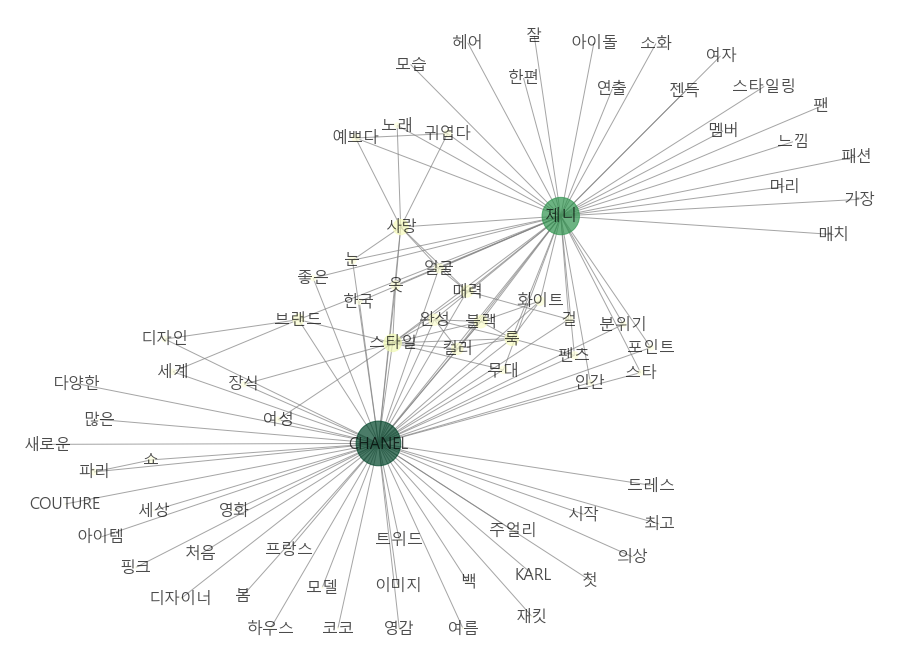

In [62]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.YlGn)

plt.savefig('./nt_CH4JE_top500_mins07.png', bbox_inches = 'tight')
plt.show()


In [42]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']